<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Input </h2>	


<h3>  Import Statements </h3>	


In [1]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os


In [2]:
train_data_path = '20_categories_training/20_categories_training'
test_data_path = '20_Validation'

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [3]:
def read_train_data(file_path):
    '''
    read the training images from dataset folder, return a dataframe with picture object, and correct encoding
    '''
    df = pd.DataFrame()
    df["Pictures"] = []
    df["Encoding"] = []

    files = sorted(os.listdir(file_path))
    if ".DS_Store" in files:
        files.remove('.DS_Store')
    for i in range(len(files)):
        images_name = sorted(os.listdir(file_path+'/'+files[i]))
        for image_name in images_name:
            image_path = file_path+'/'+files[i] + '/' + image_name
            img = io.imread(image_path)
            df = df.append(pd.Series([img,i],index=['Pictures','Encoding']),ignore_index=True)
    
    return df

def read_test_data(file_path):
    '''
    read the test images from dataset folder, return a dataframe with picture object
    '''
    df = pd.DataFrame()
    df["Pictures"] = []

    files = os.listdir(file_path)
    if ".DS_Store" in files:
        files.remove('.DS_Store')    
    files = sorted(files, key=lambda x: int(x.replace("validation_pic (", "").replace(").jpg", "")))
    
    for file in files:
        image_path = file_path + '/' + file
        img = io.imread(image_path)
        df = df.append(pd.Series([img],index=['Pictures']),ignore_index=True)

    return df

def gray_to_rgb(image):
    '''
    change a gray image into rgb image
    '''
    if(len(image.shape) == 2):
        return skimage.color.gray2rgb(image)
    else:
        return image

In [4]:
training_data = read_train_data(train_data_path)
test_data = read_test_data(test_data_path)

print(len(training_data), len(test_data))

/anaconda2/envs/py36/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/anaconda2/envs/py36/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


1501 716


In [5]:
training_data.head()
test_data.head()

,Pictures
0,"[[[80, 79, 74], [56, 55, 50], [54, 53, 48], [4..."
1,"[[[10, 15, 19], [10, 15, 19], [11, 16, 19], [1..."
2,"[[[232, 231, 247], [250, 249, 255], [235, 234,..."
3,"[[[97, 75, 77], [98, 76, 78], [99, 77, 79], [1..."
4,"[[[19, 46, 55], [19, 46, 53], [20, 47, 54], [2..."


In [6]:
# If an image is gray, change that into rgb format
training_data["Pictures"] = training_data["Pictures"].apply(gray_to_rgb)
test_data["Pictures"] = test_data["Pictures"].apply(gray_to_rgb)

#### We test the first image in each category:

In [7]:
subsample = training_data.groupby('Encoding').agg(lambda x: x.iloc[0])
subsample.head()

,Pictures
Encoding,
0.0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1.0,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2..."
2.0,"[[[65, 131, 192], [65, 131, 192], [65, 131, 19..."
3.0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4.0,"[[[50, 43, 27], [53, 45, 32], [51, 43, 30], [4..."


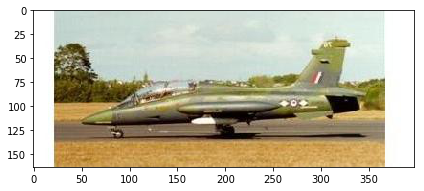

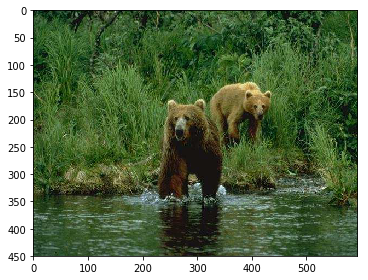

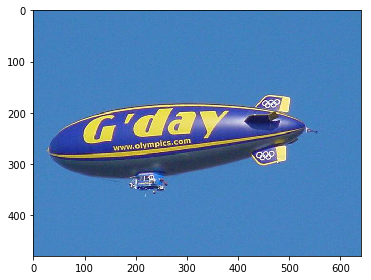

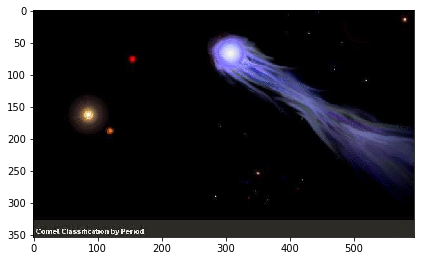

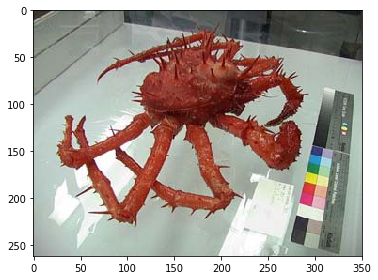

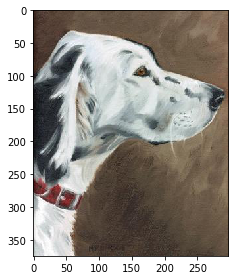

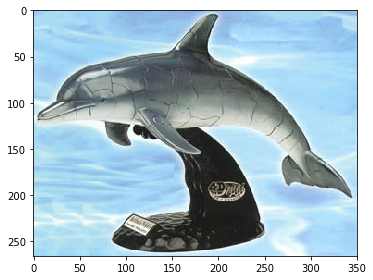

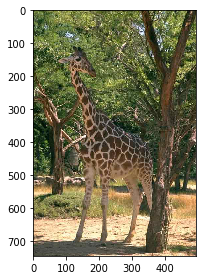

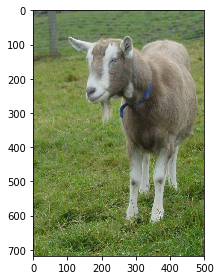

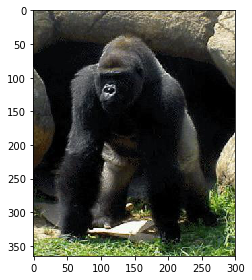

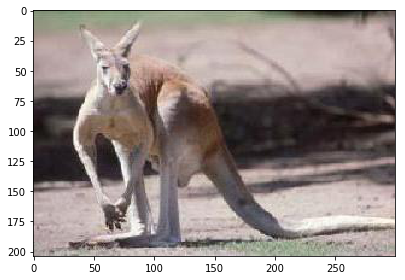

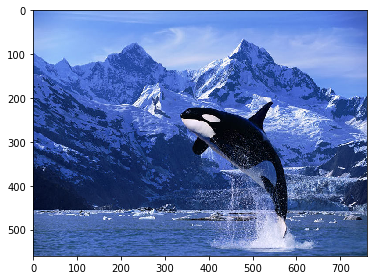

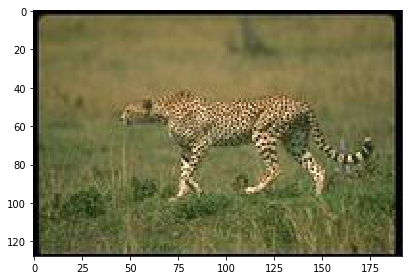

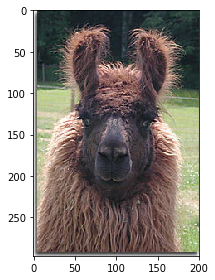

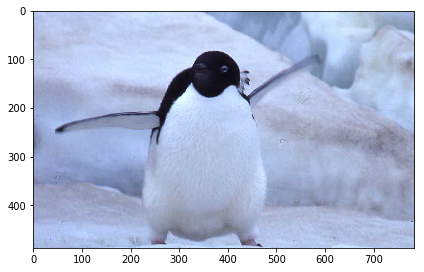

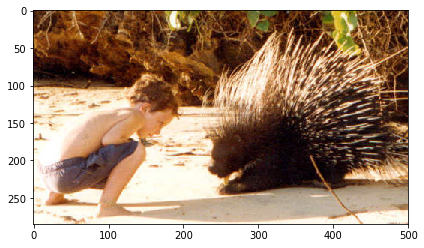

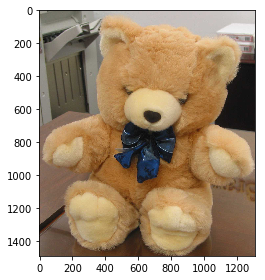

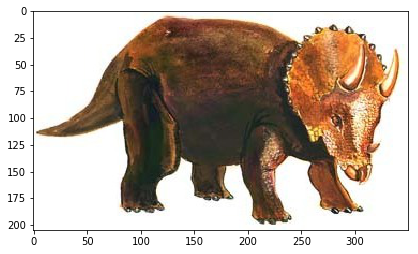

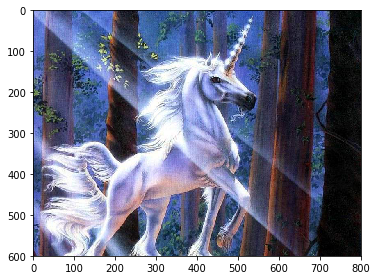

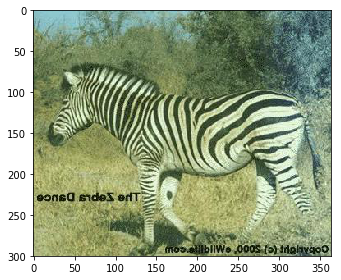

In [8]:
for i in range(len(subsample)):
    skimage.io.imshow(subsample.iloc[i]['Pictures'])
    plt.show()

#### The data is saved to h5 format

In [9]:
training_data.to_hdf("training_data.h5", "data", mode="w")
test_data.to_hdf("test_data.h5", "data", mode="w")

/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:2378: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['Pictures']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
